In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crime.csv')

In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,High Risk Area,Hour,Weekday,Month,Dist_to_Nearest_HighRisk,min_distance_to_police,Offense Level Median,Offense Level Class,Quarter,LocCrime_ArrestRate
0,6255892,HP342049,2008-05-17 18:00:00,101XX S LAFAYETTE AVE,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,True,18,5,5,0.702878,2.558320,27.0,High,2,0.101647
1,6272641,HP358387,2008-05-27 01:00:00,105XX S PERRY AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,True,...,True,1,1,5,0.147498,2.104434,20.0,Medium,2,0.067890
2,6438609,HP496499,2008-08-05 22:37:00,126XX S UNION AVE,031A,ROBBERY,ARMED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,...,True,22,1,8,1.381272,3.874142,27.0,High,3,0.056338
3,6680276,HP754070,2008-12-27 20:00:00,058XX N MANTON AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,False,20,5,12,10.525893,1.517594,18.0,Medium,4,0.048836
4,12536164,JE439378,2015-09-24 00:00:00,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,APARTMENT,False,True,...,False,0,3,9,2.540790,1.999281,34.0,High,3,0.226013


전체범죄

In [ ]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time',
       'High Risk Area', 'Hour', 'Weekday', 'Month',
       'Dist_to_Nearest_HighRisk', 'min_distance_to_police',
       'Offense Level Median', 'Offense Level Class', 'Quarter',
       'LocCrime_ArrestRate'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = df.dropna(subset=['Location Description'])

In [ ]:
df.isna().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


In [ ]:
# 1. 사용할 Feature 선택
features = [
    'Year', 'Month', 'Primary Type',
    'Description', 'Community Area',
    'Latitude', 'Longitude', 'Offense Level Median',
    'Dist_to_Nearest_HighRisk','min_distance_to_police',
    'Location Description'

]
target = 'Arrest'

In [ ]:
#  범주형 컬럼 숫자로 변환 (Label Encoding)
label_cols = ['Primary Type', 'Description', 'Location Description']
le_dict = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le

In [ ]:
# 학습 데이터 분리 (Train/Test)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# 4. 모델 학습 (랜덤 포레스트)
model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X_test)

In [ ]:
# 정확도 평가
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.8905466495296601


In [ ]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

       False       0.89      0.97      0.93   1848379
        True       0.87      0.67      0.76    630467

    accuracy                           0.89   2478846
   macro avg       0.88      0.82      0.84   2478846
weighted avg       0.89      0.89      0.89   2478846



In [ ]:
# 특성 중요도 출력
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(5))

                          importance
Description                 0.223212
Primary Type                0.184764
Offense Level Median        0.090448
Dist_to_Nearest_HighRisk    0.078265
Latitude                    0.074793


In [ ]:
feature_importance = model.feature_importances_

In [ ]:
feature_names = features

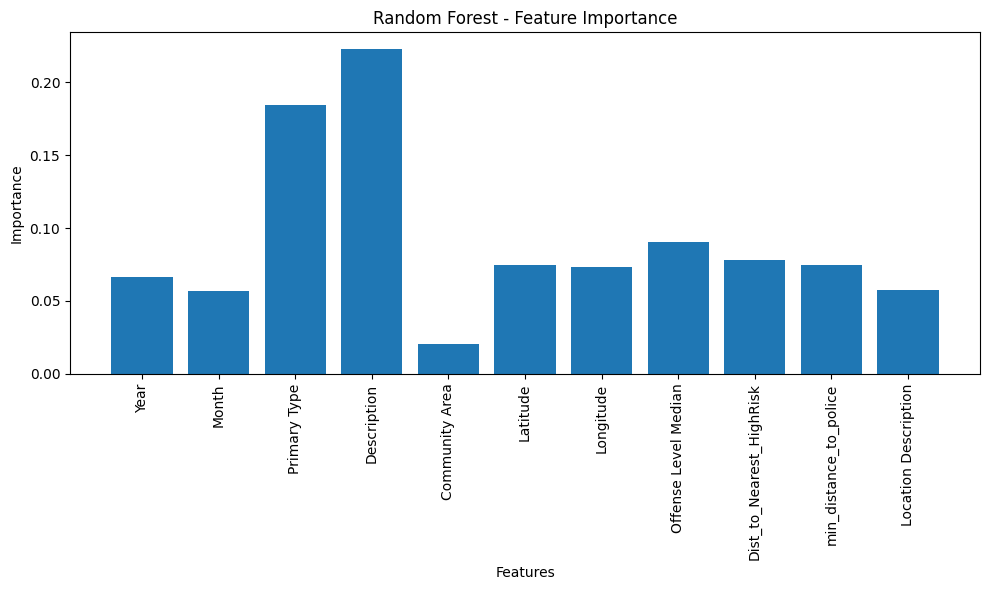

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

강력범죄

In [ ]:
# 강력범죄만 필터링
violent_df = df[df['violent']==1]

In [ ]:
violent_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time',
       'violent', 'IsViolent', 'Quarter', 'high_risk'],
      dtype='object')

위험범죄

In [ ]:
# 위험범죄만 필터링
severe_df = df[df['IsViolent']]

In [ ]:
severe_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time',
       'violent', 'IsViolent', 'Quarter'],
      dtype='object')